# Customer Churn Prediction and Segmentation

Customer churn is a critical challenge for businesses, directly impacting revenue and growth. This project employs supervised machine learning and unsupervised clustering techniques to predict customer churn and segment customers based on behavioral patterns. By leveraging advanced data analysis, feature engineering, and dimensionality reduction, this study provides actionable insights that can enhance customer retention strategies.

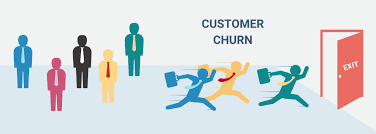


This notebook follows a structured approach:

1. Exploratory Data Analysis (EDA) – Understanding customer attributes and identifying key churn indicators.
2. Data Preprocessing & Feature Engineering – Cleaning data, handling missing values, and engineering meaningful features.
3. Supervised Learning for Churn Prediction – Implementing Random Forest and Logistic Regression to forecast customer churn.
4. Unsupervised Learning for Customer Segmentation – Applying K-Means clustering to group customers based on shared characteristics.
5. Model Evaluation & Insights – Analyzing model performance and deriving business insights for churn reduction.



This project provides a data-driven approach to customer retention by combining predictive modeling with segmentation strategies, helping businesses make informed, proactive decisions.


---





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/telecom_customer_churn.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,9,NaN,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,9,NaN,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,94553,38.014457,-122.115432,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,93010,34.227846,-119.079903,3,3,NaN,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


# Exploratory Data Analysis and Data Preprocessing

In [ ]:
df.shape

(6588, 33)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   viewer_id                    6588 non-null   object 
 1   gender                       6588 non-null   object 
 2   age                          6588 non-null   int64  
 3   married                      6588 non-null   object 
 4   number_of_family_dependents  6588 non-null   int64  
 5   city                         6588 non-null   object 
 6   zip_code                     6588 non-null   int64  
 7   latitude                     6588 non-null   float64
 8   longitude                    6588 non-null   float64
 9   number_of_referrals          6588 non-null   int64  
 10  tenure_in_months             6588 non-null   int64  
 11  offer                        2990 non-null   object 
 12  internet_service             6588 non-null   object 
 13  internet_type     

In [ ]:
df.describe()

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,93491.512750,36.199980,-119.757549,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,1857.716269,2.472582,2.155838,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989286,-121.790034,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,95333.250000,38.169605,-117.967399,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [ ]:
# To find number of null values per column
df.isnull().sum()

,0
viewer_id,0
gender,0
age,0
married,0
number_of_family_dependents,0
city,0
zip_code,0
latitude,0
longitude,0
number_of_referrals,0


In [ ]:
#The columns 'zip_code', 'latitude','longitude' seem unnecessary. Let's get rid of them
columns_to_drop = ['zip_code', 'latitude', 'longitude']
df = df.drop(columns=columns_to_drop)

# Verify the columns were removed
print("Remaining columns:", df.columns.tolist())

Remaining columns: ['viewer_id', 'gender', 'age', 'married', 'number_of_family_dependents', 'city', 'number_of_referrals', 'tenure_in_months', 'offer', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming', 'subscription_type', 'paperless_billing', 'payment_method', 'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges', 'total_revenue', 'viewer_status']


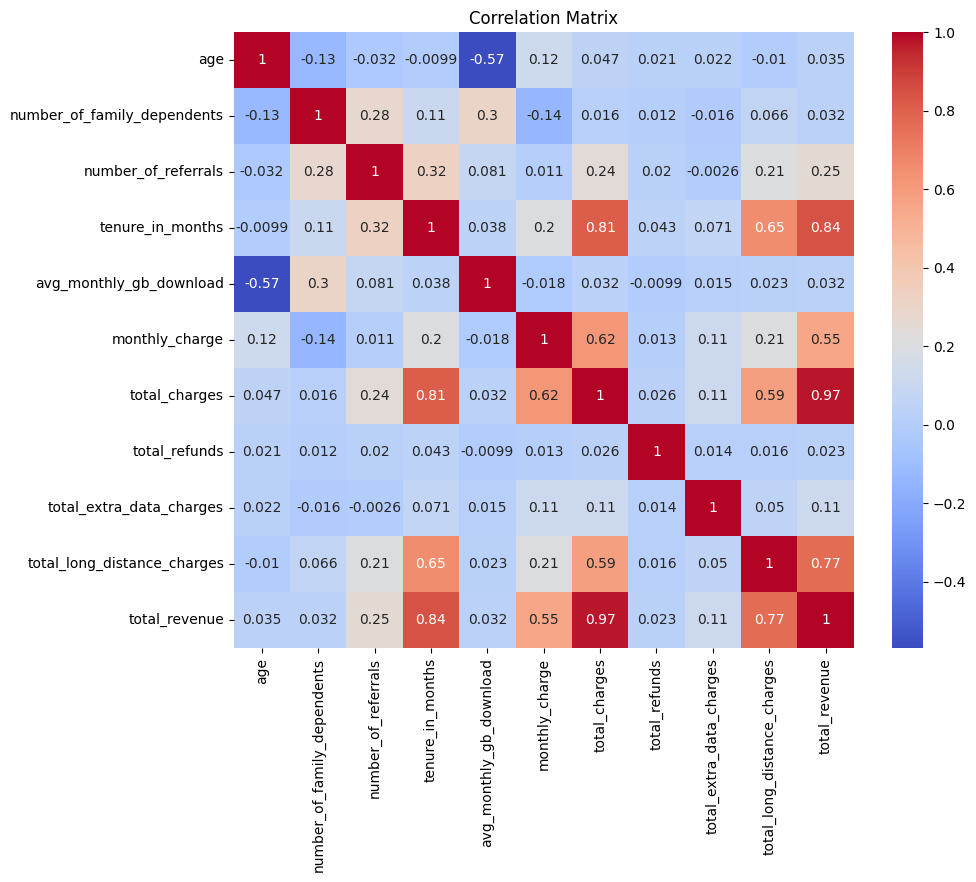

In [ ]:
# First, identify numeric columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create correlation matrix using only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
transaction_columns = [col for col in numerical_columns if col not in [
    'number_of_family_dependents',
    'number_of_referrals',
    'avg_monthly_gb_download', 'age', 'tenure_in_months'
]]

In [ ]:
df.dtypes

,0
viewer_id,object
gender,object
age,int64
married,object
number_of_family_dependents,int64
city,object
number_of_referrals,int64
tenure_in_months,int64
offer,object
internet_service,object


In [ ]:
# To find number of null values per column
df.isnull().sum()

,0
viewer_id,0
gender,0
age,0
married,0
number_of_family_dependents,0
city,0
number_of_referrals,0
tenure_in_months,0
offer,3598
internet_service,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   viewer_id                    6588 non-null   object 
 1   gender                       6588 non-null   object 
 2   age                          6588 non-null   int64  
 3   married                      6588 non-null   object 
 4   number_of_family_dependents  6588 non-null   int64  
 5   city                         6588 non-null   object 
 6   number_of_referrals          6588 non-null   int64  
 7   tenure_in_months             6588 non-null   int64  
 8   offer                        2990 non-null   object 
 9   internet_service             6588 non-null   object 
 10  internet_type                5244 non-null   object 
 11  avg_monthly_gb_download      5244 non-null   float64
 12  online_security              5244 non-null   object 
 13  online_backup     

In [ ]:
categorical_columns = list(set(df.select_dtypes(include=['object']).columns) - {'viewer_id'})

In [ ]:
# Handling null values
# Impute numeric columns with median
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-122-7a646a72129c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-122-7a646a72129c>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df

,viewer_id,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,2,9,Offer B,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,0,9,Offer B,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,3,3,Offer B,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,36,No,0,SJ,0,4,Offer B,No,Fiber Optic,21.0,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned
6584,9987-LUTYD,Female,20,No,0,SJ,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
6585,9992-RRAMN,Male,40,Yes,0,SJ,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
6586,9993-LHIEB,Male,21,Yes,0,SJ,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [ ]:
# Verifying that there are no null values now
df.isnull().sum()

,0
viewer_id,0
gender,0
age,0
married,0
number_of_family_dependents,0
city,0
number_of_referrals,0
tenure_in_months,0
offer,0
internet_service,0


In [ ]:
# Function to detect and handle outliers
def handle_outliers(df, transaction_columns):
    df_clean = df.copy()

    for column in transaction_columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Print outlier statistics
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"\nOutliers in {column}: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")

        # Cap the outliers (Winsorization)
        df_clean[column] = df_clean[column].clip(lower=lower_bound, upper=upper_bound)

    return df_clean

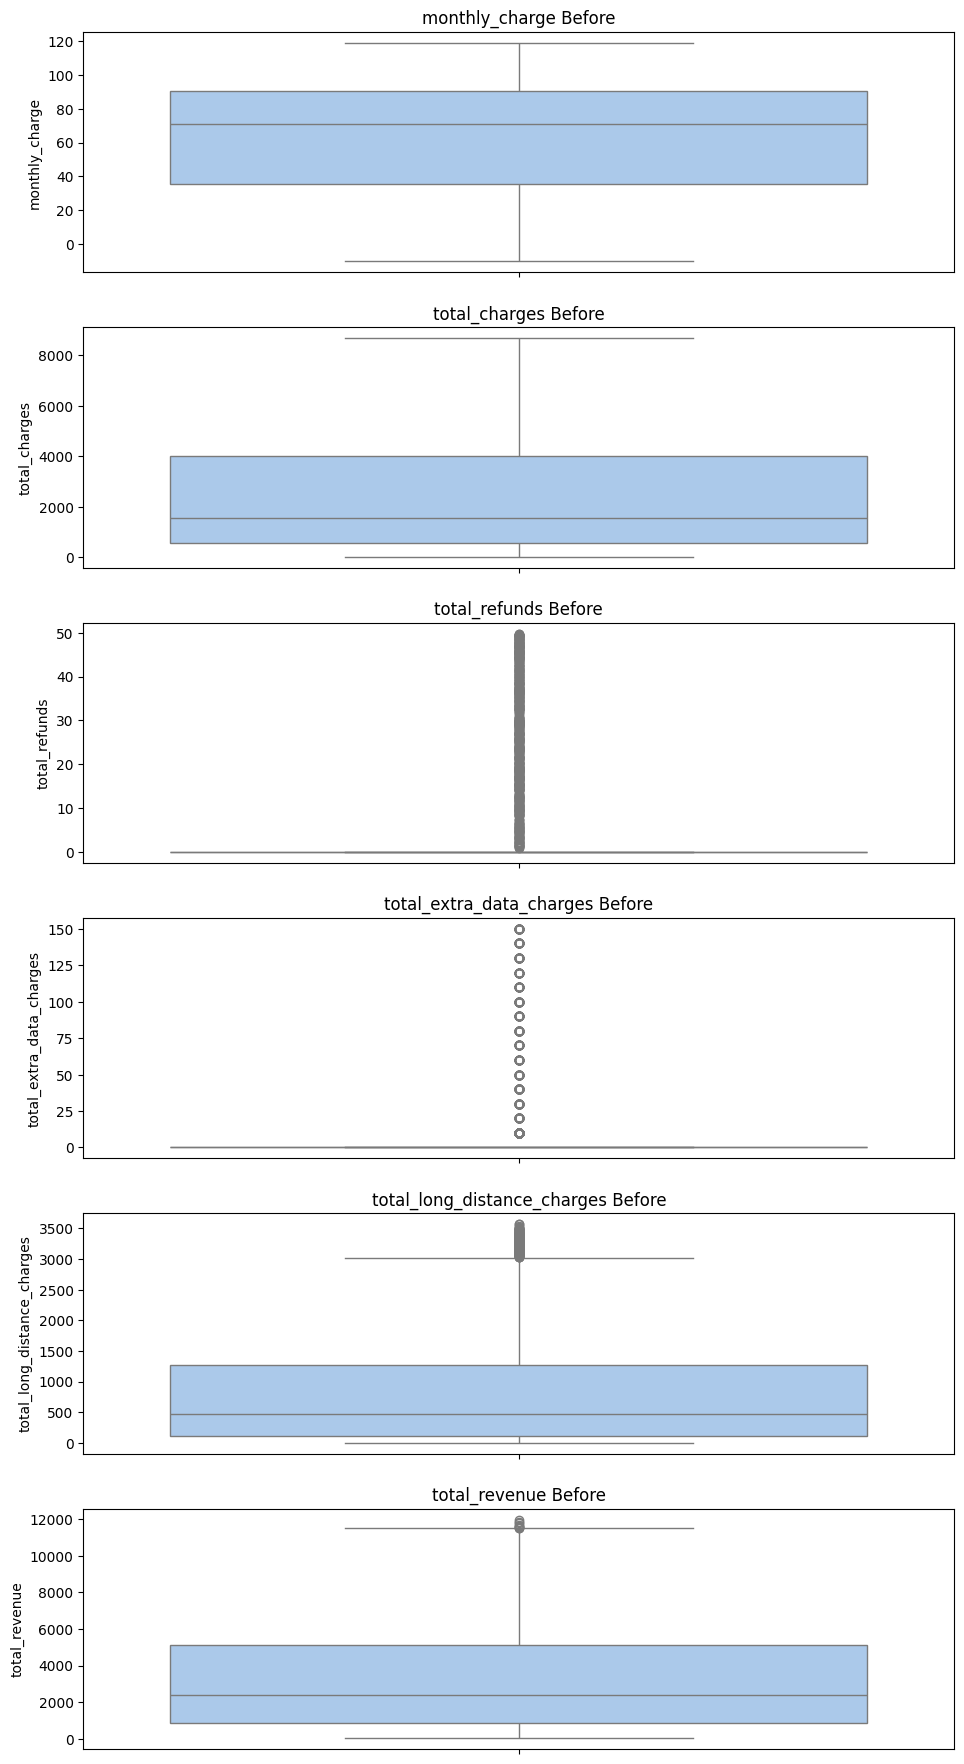

In [ ]:
# Visualize distributions before outlier handling
plt.figure(figsize=(10, len(transaction_columns) * 3))
for i, column in enumerate(transaction_columns, 1):
    plt.subplot(len(transaction_columns), 1, i)
    sns.boxplot(y=df[column])
    plt.title(f'{column} Before')
plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Handle outliers
df_no_outliers = handle_outliers(df, transaction_columns)



Outliers in monthly_charge: 0 (0.00%)

Outliers in total_charges: 0 (0.00%)

Outliers in total_refunds: 520 (7.89%)

Outliers in total_extra_data_charges: 684 (10.38%)

Outliers in total_long_distance_charges: 136 (2.06%)

Outliers in total_revenue: 9 (0.14%)


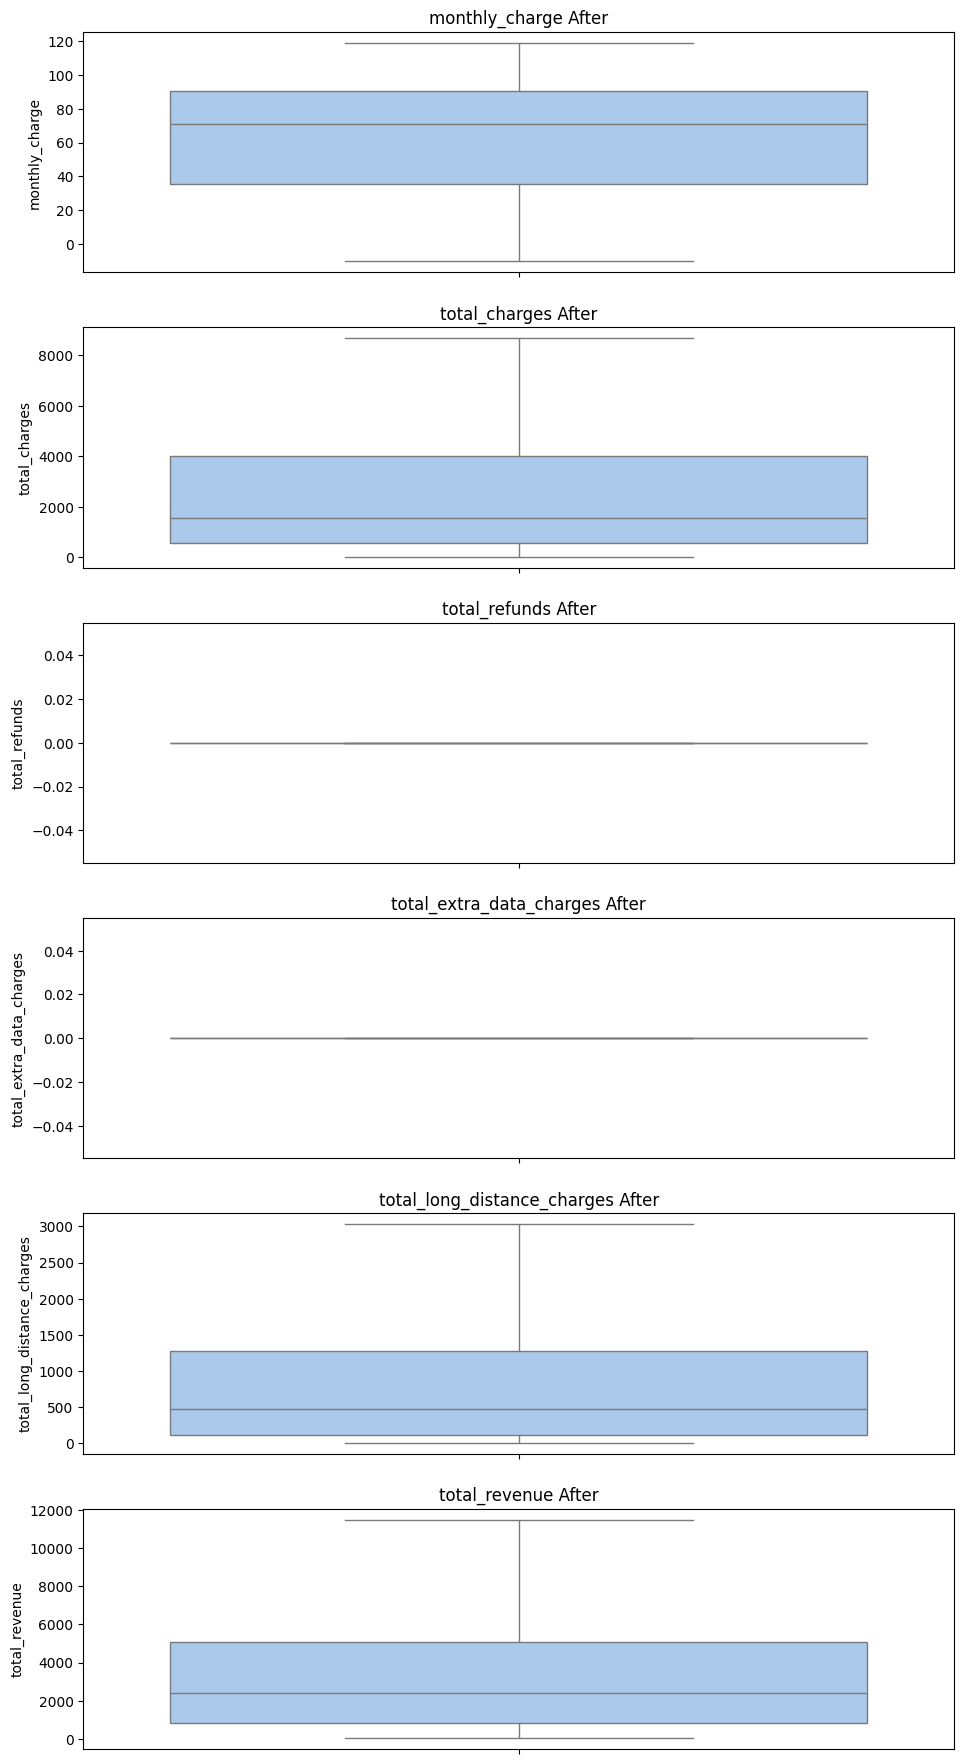

In [ ]:
# Visualize distributions after outlier handling
plt.figure(figsize=(10, len(transaction_columns) * 3))
for i, column in enumerate(transaction_columns, 1):
    plt.subplot(len(transaction_columns), 1, i)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'{column} After')
plt.tight_layout(pad=2.0)
plt.show()


In [ ]:
df_no_outliers

,viewer_id,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,2,9,Offer B,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.0,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,0,9,Offer B,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,0.0,0,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned
3,0011-IGKFF,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned
4,0013-EXCHZ,Female,75,Yes,0,SD,3,3,Offer B,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,36,No,0,SJ,0,4,Offer B,No,Fiber Optic,21.0,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned
6584,9987-LUTYD,Female,20,No,0,SJ,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.0,0,606.84,1349.74,Stayed
6585,9992-RRAMN,Male,40,Yes,0,SJ,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.0,0,356.40,2230.10,Churned
6586,9993-LHIEB,Male,21,Yes,0,SJ,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.0,0,142.04,4769.69,Stayed


In [ ]:
# Preprocessing Data

df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns, drop_first=True)

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[transaction_columns] = scaler.fit_transform(df_scaled[transaction_columns])

In [ ]:
df_scaled

,viewer_id,age,number_of_family_dependents,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,payment_method_Credit Card,payment_method_Mailed Check,device_protection_plan_Yes,streaming_music_Yes,city_SD,city_SF,city_SJ,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,online_backup_Yes,unlimited_hi-res_streaming_Yes,premium_tech_support_Yes,viewer_status_Stayed,streaming_tv_Yes,gender_Male,paperless_billing_Yes,married_Yes,subscription_type_One Year,subscription_type_Two Year,internet_type_DSL,internet_type_Fiber Optic,streaming_movies_Yes,online_security_Yes,internet_service_Yes
0,0002-ORFBO,37,0,2,9,16.0,0.018526,-0.811620,0.0,0.0,-0.490130,-0.791888,True,False,False,False,True,False,False,True,False,False,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,True
1,0003-MKNFE,46,0,0,9,10.0,-2.219714,-0.834098,0.0,0.0,-0.829747,-0.919653,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True
2,0004-TLHLJ,50,0,0,4,30.0,0.285443,-0.949598,0.0,0.0,-0.784048,-0.987940,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,True
3,0011-IGKFF,78,0,1,13,4.0,1.060466,-0.526988,0.0,0.0,-0.513759,-0.572935,False,False,True,False,True,False,False,False,False,True,False,True,True,False,False,True,True,True,True,False,False,False,True,True,False,True
4,0013-EXCHZ,75,0,3,3,11.0,0.607029,-0.955538,0.0,0.0,-0.917918,-1.032070,True,False,False,False,True,False,False,True,False,False,False,False,True,True,False,True,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,36,0,0,4,21.0,-1.417357,-1.035865,0.0,0.0,-0.934703,-1.100767,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False
6584,9987-LUTYD,20,0,0,13,59.0,-0.317532,-0.745557,0.0,0.0,-0.221901,-0.660477,True,False,False,True,False,False,True,False,False,True,False,False,True,True,True,False,False,False,False,True,False,True,False,False,True,True
6585,9992-RRAMN,40,0,1,22,17.0,0.645619,-0.246197,0.0,0.0,-0.520021,-0.351917,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,True,True,False,False,False,True,True,False,True
6586,9993-LHIEB,21,0,5,67,58.0,0.090883,0.969946,0.0,0.0,-0.775191,0.538192,True,False,True,True,False,False,True,False,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True,True,True


In [ ]:
# Checking if there are duplicate rows
print("Number of duplicate rows:", df_scaled.duplicated().sum())

Number of duplicate rows: 0


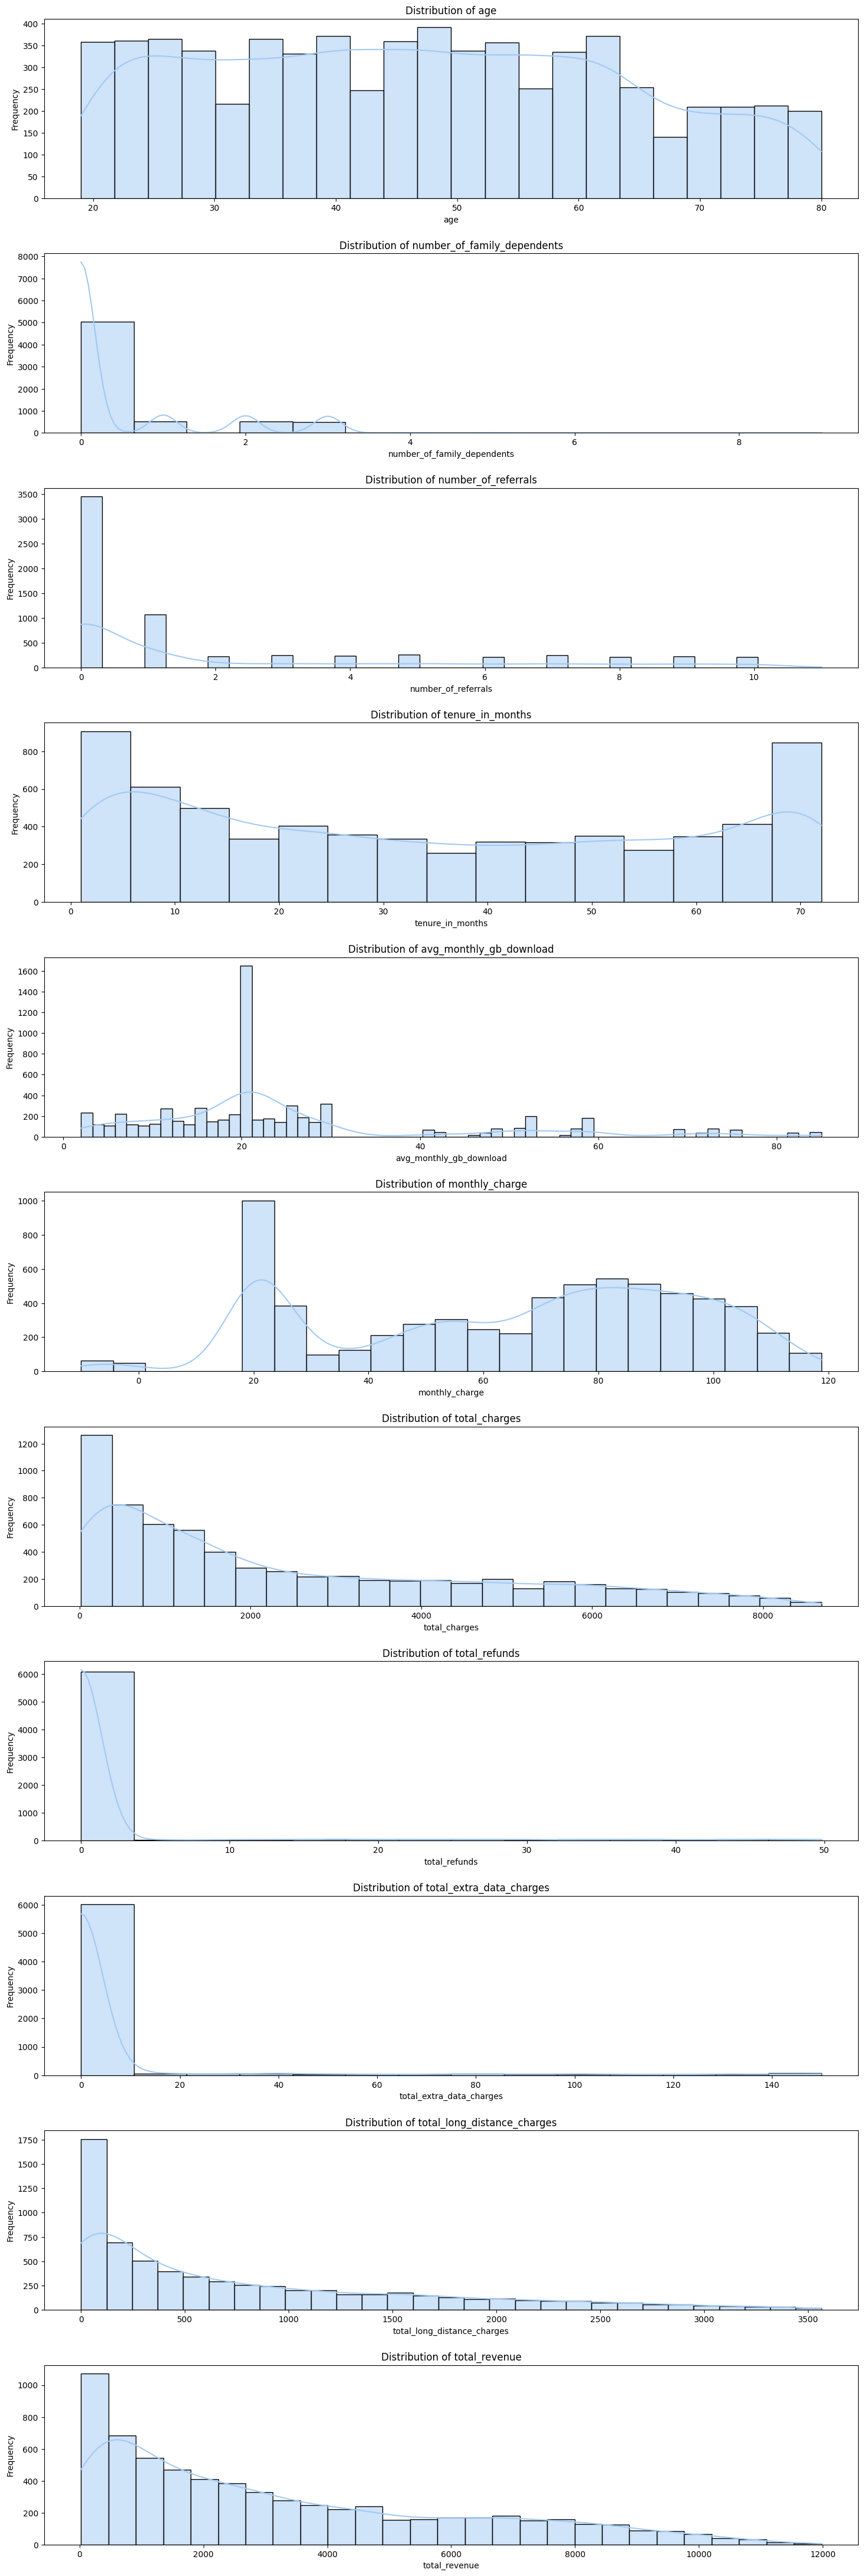

In [ ]:
sns.set_palette("pastel")
# Histograms with Kernel Density Estimation for numerical_columns
plt.figure(figsize=(15, len(numerical_columns) * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout(pad=2.0)
plt.show()

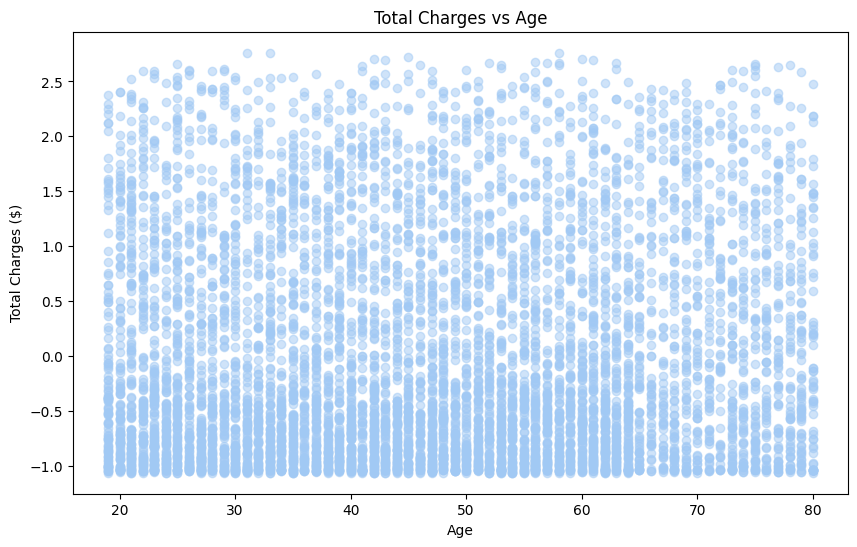

In [ ]:
# Simple line plot of total charges vs age
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled['age'], df_scaled['total_charges'], alpha=0.5)
plt.title('Total Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Total Charges ($)')
plt.show()


In [ ]:
len(df_scaled.columns)

38

# PCA

Data types of transaction columns:
monthly_charge                 float64
total_charges                  float64
total_refunds                  float64
total_extra_data_charges         int64
total_long_distance_charges    float64
total_revenue                  float64
dtype: object


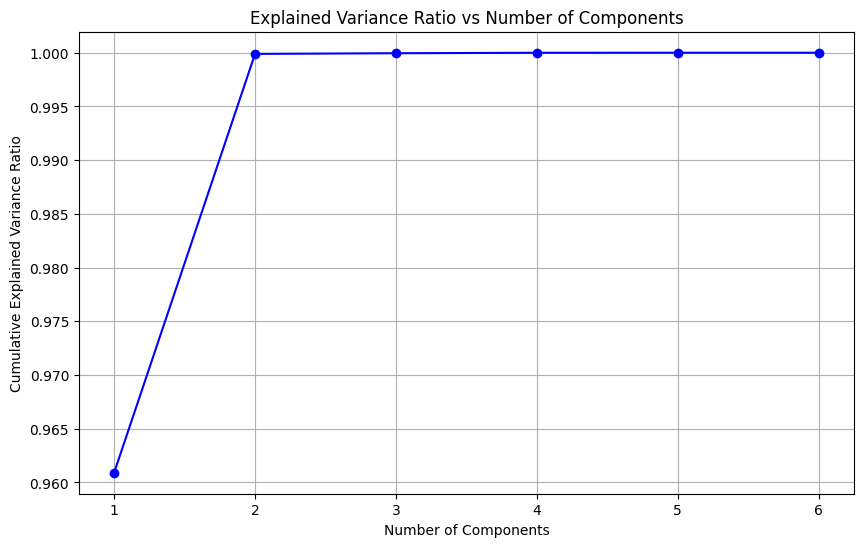

PC1 explained variance ratio: 0.961
PC2 explained variance ratio: 0.039
PC3 explained variance ratio: 0.000
PC4 explained variance ratio: 0.000
PC5 explained variance ratio: 0.000
PC6 explained variance ratio: 0.000

Number of components needed to explain 95% of variance: 1


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

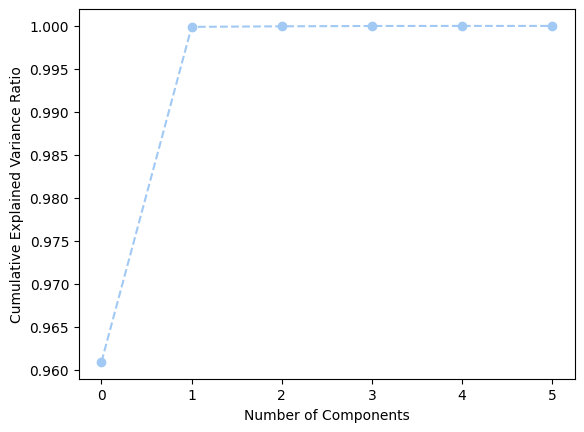

In [ ]:
# Checking data types of transaction columns
print("Data types of transaction columns:")
print(df[transaction_columns].dtypes)

# Converting transaction columns to numeric type
df_numeric = df[transaction_columns].apply(pd.to_numeric, errors='coerce')

# Performing PCA on the numeric data
pca = PCA()
pca_features = pca.fit_transform(df_numeric)

# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

# explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1} explained variance ratio: {ratio:.3f}")

# Selecting number of components based on explained variance (e.g., 95% threshold)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1
print(f"\nNumber of components needed to explain 95% of variance: {n_components}")

# Creating final PCA with selected components
pca_final = PCA(n_components=n_components)
pca_features_final = pca_final.fit_transform(df_numeric)

# Creating DataFrame with PCA results
pca_df = pd.DataFrame(
    data=pca_features_final,
    columns=[f'PC{i+1}' for i in range(n_components)]
)

plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

In [ ]:
# Performing PCA with 6 components
pca = PCA(n_components = 6)
pca.fit(df_numeric)

PCA(n_components=6)

In [ ]:
scores_pca = pca.transform(df_numeric)

# Clustering

In [ ]:
# Checking for up to 20 clusters
wcss = []

for i in range(1,20):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

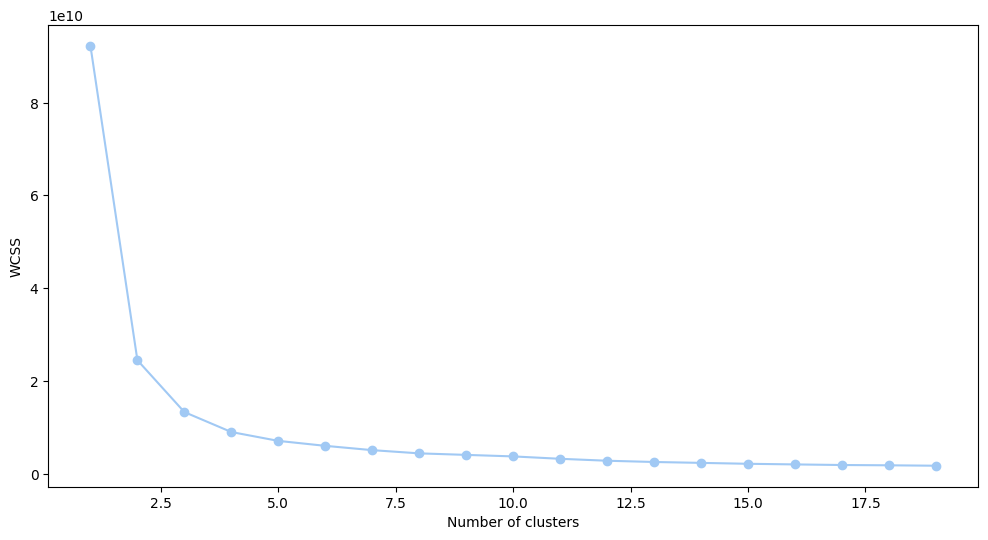

In [ ]:
# Deciding on the number of clusters using elbow method

plt.figure(figsize=(12,6))
plt.plot(range(1,20), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# The sharpest turn is at 3, so we will take 3 clusters
#  Calculating k-means
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=42)

In [ ]:
# adding the labels
df['clusters'] = kmeans_pca.labels_

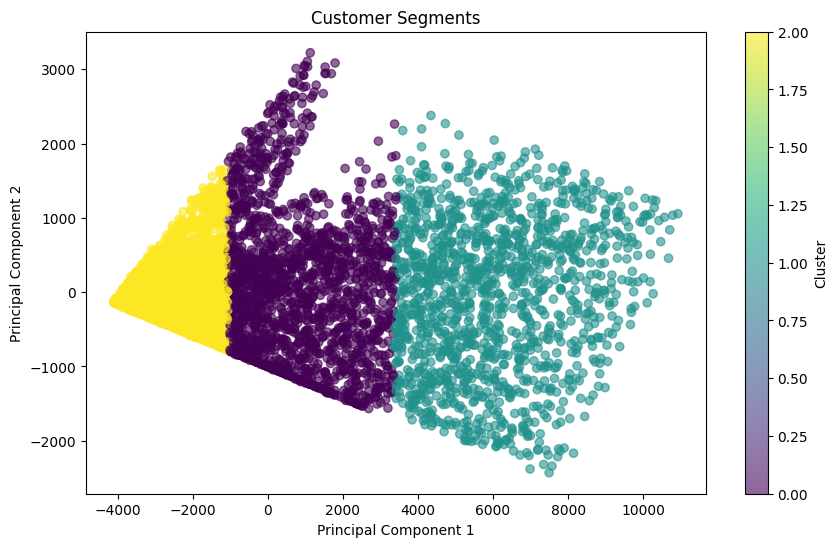

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scores_pca[:, 0], scores_pca[:, 1],
            c=kmeans_pca.labels_,
            cmap='viridis',
            alpha=0.6)

plt.title('Customer Segments')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Cluster sizes
print("\nCluster sizes:")
print(pd.Series(kmeans_pca.labels_).value_counts())


Cluster sizes:
2    3362
0    1848
1    1378
Name: count, dtype: int64


In [ ]:
df_numeric['clusters'] = kmeans_pca.labels_

# Cluster analysis
cluster_analysis = df_numeric.groupby('clusters').mean()
print("\nCluster characteristics:")
cluster_analysis


Cluster characteristics:


,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
clusters,,,,,,
0,68.221753,2869.226163,2.774951,9.096320,1006.767992,3882.315525
1,94.698948,6106.827431,1.980421,10.769231,1752.145443,7867.761684
2,51.103093,683.903611,1.741276,4.637121,292.363495,979.162951


#### Based on our cluster analysis, Cluster 0 shows the highest churn rate at 66.7%, making it the highest-risk segment.

# Prediction through Supervised Learning

In [ ]:
df

,viewer_id,gender,age,married,number_of_family_dependents,city,number_of_referrals,tenure_in_months,offer,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_hi-res_streaming,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status,clusters
0,0002-ORFBO,Female,37,Yes,0,SD,2,9,Offer B,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,2
1,0003-MKNFE,Male,46,No,0,SD,0,9,Offer B,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,2
2,0004-TLHLJ,Male,50,No,0,SD,0,4,Offer E,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,2
3,0011-IGKFF,Male,78,Yes,0,SD,1,13,Offer D,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,2
4,0013-EXCHZ,Female,75,Yes,0,SD,3,3,Offer B,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,9986-BONCE,Female,36,No,0,SJ,0,4,Offer B,No,Fiber Optic,21.0,No,No,No,No,Yes,Yes,No,Yes,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,2
6584,9987-LUTYD,Female,20,No,0,SJ,0,13,Offer D,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,2
6585,9992-RRAMN,Male,40,Yes,0,SJ,1,22,Offer D,Yes,Fiber Optic,17.0,No,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,2
6586,9993-LHIEB,Male,21,Yes,0,SJ,5,67,Offer A,Yes,Cable,58.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,0


In [ ]:
y = df_scaled['viewer_status_Stayed'].copy()
X = df_scaled.drop(columns=['viewer_status_Stayed', 'viewer_id']).copy()

In [ ]:
# Before we run a model, we need to reduce the number of features and exclude the highly correlated ones
# Defining a threshold to remove collinear
def remove_collinear_features(x, threshold):
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return x

In [ ]:
# First, let's check the shape of our data
print("Initial shape:", X.shape)

# Apply the collinearity removal with a lower threshold (0.7) to remove more correlated features
X = remove_collinear_features(X, threshold=0.4)
print("Shape after removing collinear features:", X.shape)

Initial shape: (6588, 36)
Removed Columns {'premium_tech_support_Yes', 'avg_monthly_gb_download', 'total_revenue', 'offer_Offer E', 'total_long_distance_charges', 'streaming_music_Yes', 'internet_service_Yes', 'total_charges', 'streaming_movies_Yes', 'online_backup_Yes', 'device_protection_plan_Yes', 'online_security_Yes', 'subscription_type_Two Year', 'city_SJ', 'internet_type_Fiber Optic', 'city_SF', 'married_Yes', 'offer_Offer D'}
Shape after removing collinear features: (6588, 18)


## Model 1: Logistic Regression

In [ ]:
X

,age,number_of_family_dependents,number_of_referrals,tenure_in_months,monthly_charge,total_refunds,total_extra_data_charges,payment_method_Credit Card,payment_method_Mailed Check,city_SD,offer_Offer B,offer_Offer C,unlimited_hi-res_streaming_Yes,streaming_tv_Yes,gender_Male,paperless_billing_Yes,subscription_type_One Year,internet_type_DSL
0,37,0,2,9,0.018526,0.0,0.0,True,False,True,True,False,True,True,False,True,True,False
1,46,0,0,9,-2.219714,0.0,0.0,True,False,True,True,False,False,False,True,False,False,False
2,50,0,0,4,0.285443,0.0,0.0,False,False,True,False,False,True,False,True,True,False,False
3,78,0,1,13,1.060466,0.0,0.0,False,False,True,False,False,True,True,True,True,False,False
4,75,0,3,3,0.607029,0.0,0.0,True,False,True,True,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,36,0,0,4,-1.417357,0.0,0.0,False,False,False,True,False,True,True,False,False,False,False
6584,20,0,0,13,-0.317532,0.0,0.0,True,False,False,False,False,True,False,False,False,True,True
6585,40,0,1,22,0.645619,0.0,0.0,False,False,False,False,False,True,False,True,True,False,False
6586,21,0,5,67,0.090883,0.0,0.0,True,False,False,False,False,True,False,True,False,False,False


In [ ]:
y

,viewer_status_Stayed
0,True
1,True
2,False
3,False
4,False
...,...
6583,False
6584,True
6585,False
6586,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.81
Test Accuracy: 0.84

Confusion Matrix:
[[243 126]
 [ 90 859]]

Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.66      0.69       369
        True       0.87      0.91      0.89       949

    accuracy                           0.84      1318
   macro avg       0.80      0.78      0.79      1318
weighted avg       0.83      0.84      0.83      1318



## Model 2: Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to get accuracy
rf_accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Train the model and evaluate on the test set
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Compute evaluation metrics for Random Forest
rf_test_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

# Mean Squared Error
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')


print(f'Test set - Accuracy: {rf_test_accuracy:.2f}')
print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Calculate the mean MSE of the scores
mean_mse = mse_scores.mean()
mean_r2 = r2_scores.mean()

print(f'Training set - Mean MSE: {mean_mse:.2f}, Mean R2: {mean_r2:.2f}')


Test set - Accuracy: 0.86

Confusion Matrix:
[[245 124]
 [ 56 893]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.66      0.73       369
        True       0.88      0.94      0.91       949

    accuracy                           0.86      1318
   macro avg       0.85      0.80      0.82      1318
weighted avg       0.86      0.86      0.86      1318

Training set - Mean MSE: 0.15, Mean R2: 0.26


# Top 5 Features

### Using Logistic Regression Model

In [ ]:
# Get features and coefficients
feature_names = X_train.columns
coefficients = model.coef_.flatten()

# Create a DataFrame for better visualization
log_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

print("Feature Coefficients:")
print(log_df)
print("\n")

# Get feature names and coefficients
coefficients = pd.DataFrame({'feature': X_train.columns, 'coefficient': coefficients})

# Sort by absolute values of the coefficients and get the top 5
top_5_features = coefficients.reindex(coefficients.coefficient.abs().sort_values(ascending=False).index).head(5)

print("Top 5 factors affecting churn (using Logistic Regression):")
print(top_5_features)


Feature Coefficients:
                           Feature  Coefficient
0                              age    -0.007918
1      number_of_family_dependents     0.487291
2              number_of_referrals     0.254297
3                 tenure_in_months     0.050170
4                   monthly_charge    -0.639770
5                    total_refunds     0.000000
6         total_extra_data_charges     0.000000
7       payment_method_Credit Card     0.642926
8      payment_method_Mailed Check    -0.190404
9                          city_SD    -0.259881
10                   offer_Offer B    -0.101474
11                   offer_Offer C     0.295821
12  unlimited_hi-res_streaming_Yes     0.166437
13                streaming_tv_Yes     0.004718
14                     gender_Male    -0.016655
15           paperless_billing_Yes    -0.453323
16      subscription_type_One Year     0.729446
17               internet_type_DSL     0.231952


Top 5 factors affecting churn (using Logistic Regression):
     

### Using Random Forest Model

In [ ]:
# get the feature importances
importances = rf_model.feature_importances_

# create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})


# sort the features by importance, in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

print("Top 5 factors affecting churn (using Random Forest Regression):")
print(feature_importances.head(5))

Top 5 factors affecting churn (using Random Forest Regression):
                       feature  importance
0             tenure_in_months    0.345786
1               monthly_charge    0.177066
2                          age    0.120802
3          number_of_referrals    0.112767
4  number_of_family_dependents    0.040482


## Recommendations for reducing churn rate

### Based on the cluster analysis shown in the search results, Cluster 0 shows the highest churn rate at 66.7%, making it the highest-risk segment.

### The recommended actions are:

### 1. Offer personalized contract renewal incentives
### 2. Implement personalized content recommendations
### 3. Proactive technical support
### 4. Family plan upgrades


